In [1]:
#import required 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
df=pd.read_csv('wine.csv')
df.shape

(1599, 12)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#check null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
#check skew
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [6]:
#try to remove skew,need help
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log10(df[col])

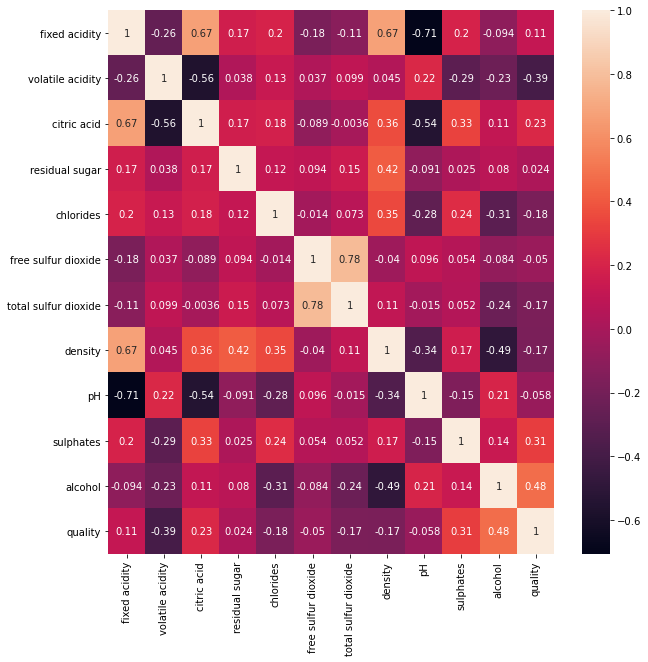

In [7]:
#check correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),color='k',annot=True)

In [8]:
#residual sugar correlates with quality very less hence dropping
df.drop('residual sugar',axis=1,inplace=True)

fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.523571,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.656429,0.536818;0.110714x0.343182)
total sulfur dioxide    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
density                       AxesSubplot(0.125,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.257857,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.390714,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.523571,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

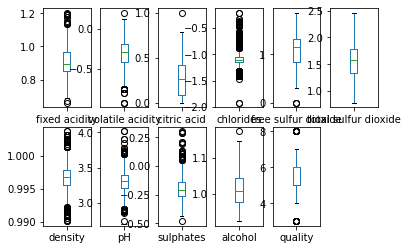

In [9]:
#check for outliers
df.plot(kind='box',subplots=True,layout = (2,6))

In [10]:
#checked zscore and dropped values which had zscore above 3
from scipy.stats import zscore
z=np.abs(zscore(df))
z
ds = df[(z<3).all(axis=1)]

In [11]:
ds.shape

(1507, 11)

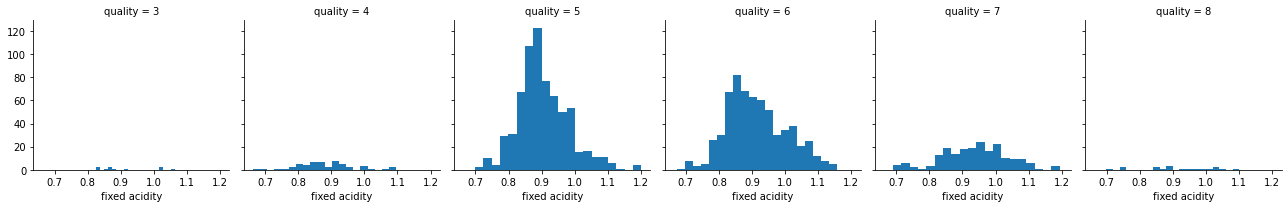

In [14]:
g = sns.FacetGrid(df, col='quality')
g.map(plt.hist, 'fixed acidity', bins=20)

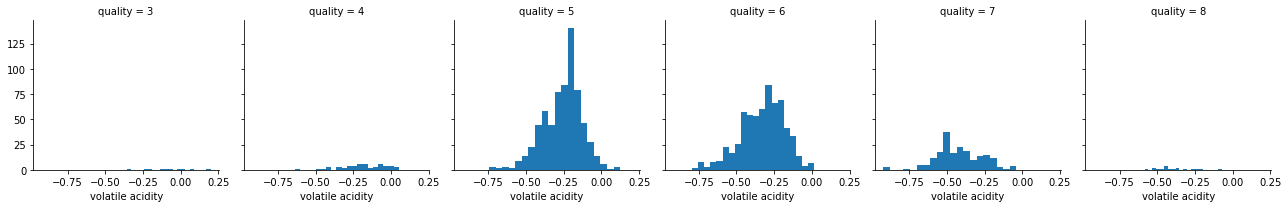

In [15]:
g = sns.FacetGrid(df, col='quality')
g.map(plt.hist, 'volatile acidity', bins=20)

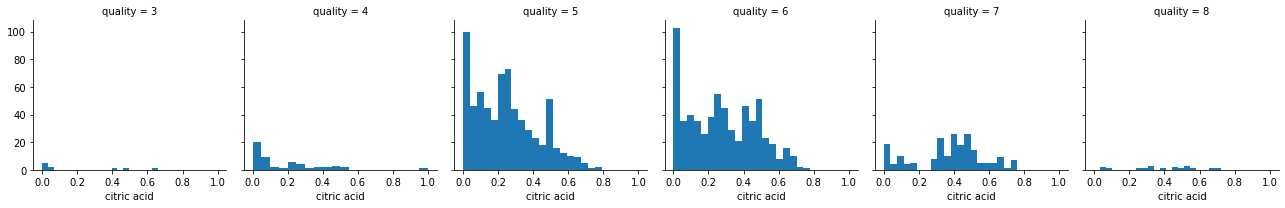

In [16]:
g = sns.FacetGrid(df, col='quality')
g.map(plt.hist, 'citric acid', bins=20)

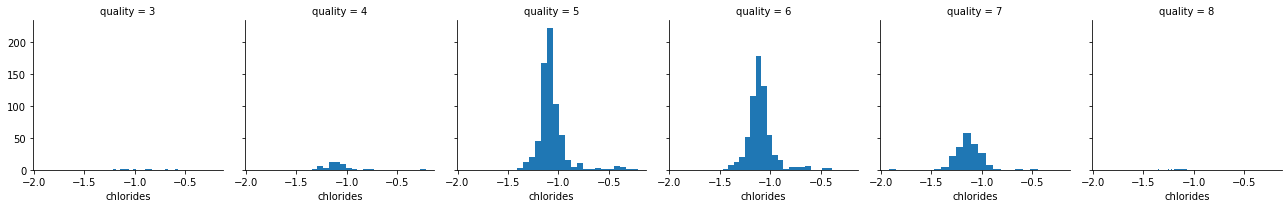

In [17]:
g = sns.FacetGrid(df, col='quality')
g.map(plt.hist, 'chlorides', bins=20)

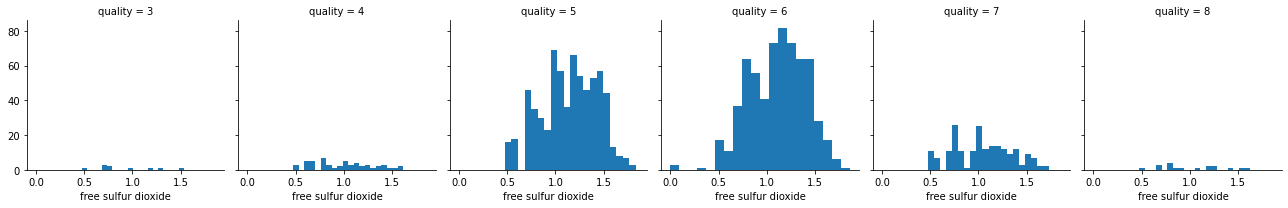

In [18]:
g = sns.FacetGrid(df, col='quality')
g.map(plt.hist, 'free sulfur dioxide', bins=20)

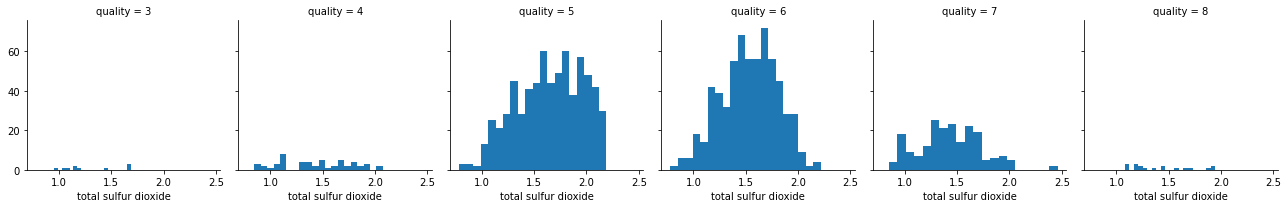

In [19]:
g = sns.FacetGrid(df, col='quality')
g.map(plt.hist, 'total sulfur dioxide', bins=20)

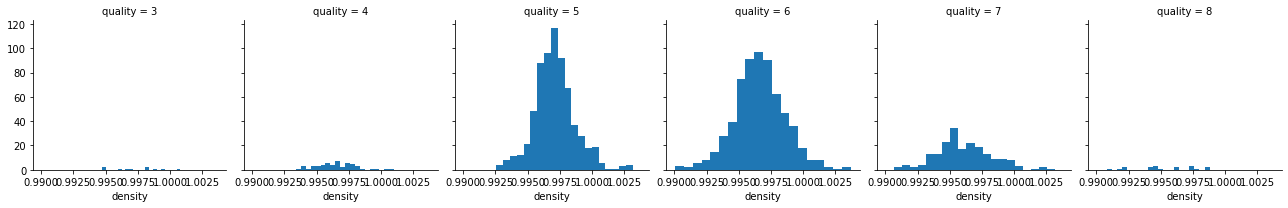

In [20]:
g = sns.FacetGrid(df, col='quality')
g.map(plt.hist, 'density', bins=20)

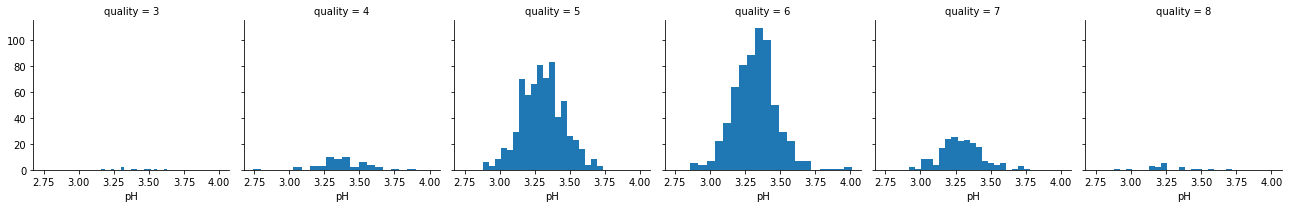

In [21]:
g = sns.FacetGrid(df, col='quality')
g.map(plt.hist, 'pH', bins=20)

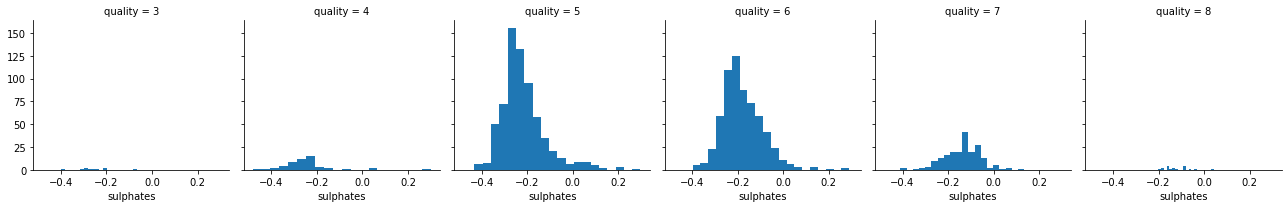

In [22]:
g = sns.FacetGrid(df, col='quality')
g.map(plt.hist, 'sulphates', bins=20)

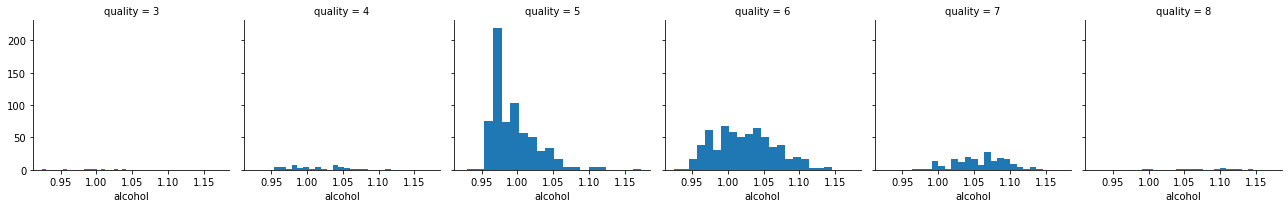

In [23]:
g = sns.FacetGrid(df, col='quality')
g.map(plt.hist, 'alcohol', bins=20)

In [24]:
#divided the data
x=ds.iloc[:,0:-1]
x.shape
y=ds.iloc[:,-1]
y.shape

(1507,)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .33,random_state=46)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [26]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
dtcpred=DTC.predict(x_test)
print(accuracy_score(y_test,dtcpred))
print(confusion_matrix(y_test,dtcpred))
print(classification_report(y_test,dtcpred))

0.6164658634538153
[[  3  13   5   2   0]
 [  3 134  51   9   0]
 [  6  39 127  20   1]
 [  0   8  24  42   0]
 [  0   0   2   8   1]]
              precision    recall  f1-score   support

           4       0.25      0.13      0.17        23
           5       0.69      0.68      0.69       197
           6       0.61      0.66      0.63       193
           7       0.52      0.57      0.54        74
           8       0.50      0.09      0.15        11

    accuracy                           0.62       498
   macro avg       0.51      0.43      0.44       498
weighted avg       0.61      0.62      0.61       498



In [27]:
x1=ds.iloc[:,0:-1]
x1.shape
y1=ds.iloc[:,-1]
y1.shape

(1507,)

In [35]:
max_acc = 0
random_state=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .22,random_state=i)
    DTC.fit(x1_train,y1_train)
    pred_dtc = DTC.predict(x1_test)
    x=accuracy_score(y1_test,pred_dtc)
    if x>max_acc:
        max_acc = x
        random_state=i

In [36]:
print(max_acc,
random_state)

0.6746987951807228 76


In [ ]:
#final model
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .22,random_state=76)
DTC.fit(x1_train,y1_train)
pred_dtc = DTC.predict(x1_test)
print(accuracy_score(y1_test,pred_dtc))

In [39]:
import joblib
joblib.dump(DTC,'wines_dtc.pkl')

['wines_dtc.pkl']